In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1554 non-null   object 
 1   Weeks          1554 non-null   int64  
 2   FVC            1554 non-null   int64  
 3   Percent        1554 non-null   float64
 4   Age            1554 non-null   int64  
 5   Sex            1554 non-null   object 
 6   SmokingStatus  1554 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 85.1+ KB


In [4]:
dummies = pd.get_dummies(df[['Sex', 'SmokingStatus', 'Patient']], drop_first= True)

In [5]:
df = pd.concat([df, dummies], axis = 1)

In [6]:
df = df.drop(['Patient', 'Sex', 'SmokingStatus'], axis =1)

In [15]:
df.head()

,Weeks,FVC,Percent,Age,Sex_Male,SmokingStatus_Ex-smoker,SmokingStatus_Never smoked,Patient_ID00009637202177434476278,Patient_ID00010637202177584971671,Patient_ID00011637202177653955184,...,Patient_ID00407637202308788732304,Patient_ID00408637202308839708961,Patient_ID00411637202309374271828,Patient_ID00414637202310318891556,Patient_ID00417637202310901214011,Patient_ID00419637202311204720264,Patient_ID00421637202311550012437,Patient_ID00422637202311677017371,Patient_ID00423637202312137826377,Patient_ID00426637202313170790466
0,-4,2315,58.253649,79,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,2214,55.712129,79,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,2061,51.862104,79,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,2144,53.950679,79,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11,2069,52.063412,79,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Columns: 182 entries, Weeks to Patient_ID00426637202313170790466
dtypes: float64(1), int64(3), uint8(178)
memory usage: 318.8 KB


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X= df.drop('FVC', axis = 1)
y = df['FVC']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
X_train = scaler.fit_transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [17]:
model = Sequential()

model.add(Dense(182, activation='relu'))

model.add(Dense(91, activation='relu'))

model.add(Dense(45, activation='relu'))

model.add(Dense(1, activation = 'relu'))

model.compile(loss='mse', optimizer = 'adam')

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 100)

model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), epochs = 600, callbacks = [early_stop])

Epoch 1/600
34/34 [==============================] - 0s 11ms/step - loss: 7815204.5000 - val_loss: 8119226.0000
Epoch 2/600
34/34 [==============================] - 0s 3ms/step - loss: 7558998.0000 - val_loss: 7400746.0000
Epoch 3/600
34/34 [==============================] - 0s 3ms/step - loss: 5723596.5000 - val_loss: 3864856.5000
Epoch 4/600
34/34 [==============================] - ETA: 0s - loss: 2025433.625 - 0s 4ms/step - loss: 1602190.8750 - val_loss: 523490.1562
Epoch 5/600
34/34 [==============================] - 0s 5ms/step - loss: 483340.4375 - val_loss: 452062.3125
Epoch 6/600
34/34 [==============================] - 0s 7ms/step - loss: 394161.7812 - val_loss: 389972.3438
Epoch 7/600
34/34 [==============================] - 0s 6ms/step - loss: 336615.6875 - val_loss: 338497.7812
Epoch 8/600
34/34 [==============================] - 0s 3ms/step - loss: 284811.0312 - val_loss: 287978.0938
Epoch 9/600
34/34 [==============================] - 0s 3ms/step - loss: 240030.5938 - val

Epoch 77/600
34/34 [==============================] - 0s 3ms/step - loss: 4788.7817 - val_loss: 7501.2856
Epoch 78/600
34/34 [==============================] - 0s 3ms/step - loss: 4691.8687 - val_loss: 7229.9551
Epoch 79/600
34/34 [==============================] - 0s 3ms/step - loss: 4499.1846 - val_loss: 7234.0747
Epoch 80/600
34/34 [==============================] - 0s 3ms/step - loss: 4439.3916 - val_loss: 7080.0059
Epoch 81/600
34/34 [==============================] - 0s 3ms/step - loss: 4362.3374 - val_loss: 6982.7412
Epoch 82/600
34/34 [==============================] - 0s 3ms/step - loss: 4318.5815 - val_loss: 6920.2402
Epoch 83/600
34/34 [==============================] - 0s 3ms/step - loss: 4264.3467 - val_loss: 7014.1768
Epoch 84/600
34/34 [==============================] - 0s 3ms/step - loss: 4153.1436 - val_loss: 6725.6626
Epoch 85/600
34/34 [==============================] - 0s 3ms/step - loss: 4080.2029 - val_loss: 6649.2759
Epoch 86/600
34/34 [==========================

Epoch 154/600
34/34 [==============================] - 0s 3ms/step - loss: 1389.0444 - val_loss: 2495.5991
Epoch 155/600
34/34 [==============================] - 0s 4ms/step - loss: 1382.2699 - val_loss: 3047.0715
Epoch 156/600
34/34 [==============================] - 0s 6ms/step - loss: 1443.1428 - val_loss: 3267.6023
Epoch 157/600
34/34 [==============================] - 0s 3ms/step - loss: 1508.9362 - val_loss: 2476.4231
Epoch 158/600
34/34 [==============================] - 0s 3ms/step - loss: 1315.9990 - val_loss: 2508.0593
Epoch 159/600
34/34 [==============================] - 0s 3ms/step - loss: 1269.3826 - val_loss: 2391.9182
Epoch 160/600
34/34 [==============================] - 0s 4ms/step - loss: 1239.6849 - val_loss: 2323.3455
Epoch 161/600
34/34 [==============================] - 0s 3ms/step - loss: 1250.9769 - val_loss: 2305.3220
Epoch 162/600
34/34 [==============================] - 0s 3ms/step - loss: 1400.8859 - val_loss: 2487.7756
Epoch 163/600
34/34 [================

34/34 [==============================] - 0s 4ms/step - loss: 690.5601 - val_loss: 1792.8405
Epoch 232/600
34/34 [==============================] - 0s 3ms/step - loss: 702.8649 - val_loss: 1710.8678
Epoch 233/600
34/34 [==============================] - 0s 4ms/step - loss: 696.6348 - val_loss: 1729.9989
Epoch 234/600
34/34 [==============================] - 0s 4ms/step - loss: 634.5388 - val_loss: 1633.9644
Epoch 235/600
34/34 [==============================] - 0s 3ms/step - loss: 681.5850 - val_loss: 1633.7156
Epoch 236/600
34/34 [==============================] - 0s 3ms/step - loss: 683.4281 - val_loss: 1737.8206
Epoch 237/600
34/34 [==============================] - 0s 3ms/step - loss: 646.6233 - val_loss: 1881.6445
Epoch 238/600
34/34 [==============================] - 0s 3ms/step - loss: 678.3307 - val_loss: 2102.4517
Epoch 239/600
34/34 [==============================] - 0s 3ms/step - loss: 717.2768 - val_loss: 1788.5811
Epoch 240/600
34/34 [==============================] - 0s 3m

34/34 [==============================] - 0s 4ms/step - loss: 806.9624 - val_loss: 1836.5706
Epoch 309/600
34/34 [==============================] - 0s 4ms/step - loss: 654.1984 - val_loss: 1752.4462
Epoch 310/600
34/34 [==============================] - 0s 4ms/step - loss: 701.0250 - val_loss: 1785.2444
Epoch 311/600
34/34 [==============================] - 0s 4ms/step - loss: 575.2511 - val_loss: 1640.5502
Epoch 312/600
34/34 [==============================] - 0s 5ms/step - loss: 617.8122 - val_loss: 1790.1804
Epoch 313/600
34/34 [==============================] - 0s 3ms/step - loss: 542.4597 - val_loss: 1659.7137
Epoch 314/600
34/34 [==============================] - 0s 4ms/step - loss: 531.2493 - val_loss: 1623.4583
Epoch 315/600
34/34 [==============================] - 0s 5ms/step - loss: 613.9486 - val_loss: 1603.3167
Epoch 316/600
34/34 [==============================] - 0s 4ms/step - loss: 547.2443 - val_loss: 2049.8521
Epoch 317/600
34/34 [==============================] - 0s 4m

34/34 [==============================] - 0s 5ms/step - loss: 448.7204 - val_loss: 1471.1686
Epoch 386/600
34/34 [==============================] - 0s 3ms/step - loss: 489.4603 - val_loss: 1796.8922
Epoch 387/600
34/34 [==============================] - 0s 3ms/step - loss: 526.6072 - val_loss: 1631.9694
Epoch 388/600
34/34 [==============================] - 0s 3ms/step - loss: 615.3765 - val_loss: 1859.1361
Epoch 389/600
34/34 [==============================] - 0s 3ms/step - loss: 779.1619 - val_loss: 2235.0188
Epoch 390/600
34/34 [==============================] - 0s 3ms/step - loss: 565.4490 - val_loss: 1485.8999
Epoch 391/600
34/34 [==============================] - 0s 3ms/step - loss: 471.3924 - val_loss: 1541.6855
Epoch 392/600
34/34 [==============================] - 0s 4ms/step - loss: 472.5053 - val_loss: 1509.7664
Epoch 393/600
34/34 [==============================] - 0s 4ms/step - loss: 450.4350 - val_loss: 1502.8026
Epoch 394/600
34/34 [==============================] - 0s 4m

34/34 [==============================] - 0s 7ms/step - loss: 550.9385 - val_loss: 1820.4939
Epoch 463/600
34/34 [==============================] - 0s 5ms/step - loss: 495.9094 - val_loss: 1557.7689
Epoch 464/600
34/34 [==============================] - 0s 6ms/step - loss: 452.9492 - val_loss: 1522.7058
Epoch 465/600
34/34 [==============================] - 0s 6ms/step - loss: 499.4355 - val_loss: 1730.2426
Epoch 466/600
34/34 [==============================] - 0s 6ms/step - loss: 632.6266 - val_loss: 1603.3470
Epoch 467/600
34/34 [==============================] - 0s 4ms/step - loss: 494.2570 - val_loss: 1447.5973
Epoch 468/600
34/34 [==============================] - 0s 4ms/step - loss: 414.7749 - val_loss: 1457.2823
Epoch 469/600
34/34 [==============================] - 0s 3ms/step - loss: 504.9874 - val_loss: 1737.1840
Epoch 470/600
34/34 [==============================] - 0s 4ms/step - loss: 488.6631 - val_loss: 1547.2092
Epoch 471/600
34/34 [==============================] - 0s 4m

34/34 [==============================] - 0s 4ms/step - loss: 403.6198 - val_loss: 1368.8744
Epoch 540/600
34/34 [==============================] - 0s 4ms/step - loss: 409.6160 - val_loss: 1459.3740
Epoch 541/600
34/34 [==============================] - 0s 4ms/step - loss: 407.2226 - val_loss: 1529.7975
Epoch 542/600
34/34 [==============================] - 0s 3ms/step - loss: 365.9134 - val_loss: 1453.6477
Epoch 543/600
34/34 [==============================] - 0s 3ms/step - loss: 404.8386 - val_loss: 1426.3152
Epoch 544/600
34/34 [==============================] - 0s 4ms/step - loss: 379.1996 - val_loss: 1405.9977
Epoch 545/600
34/34 [==============================] - 0s 3ms/step - loss: 369.2707 - val_loss: 1445.7125
Epoch 546/600
34/34 [==============================] - 0s 3ms/step - loss: 455.6684 - val_loss: 1539.0725
Epoch 547/600
34/34 [==============================] - 0s 4ms/step - loss: 458.8772 - val_loss: 1570.6073
Epoch 548/600
34/34 [==============================] - 0s 4m

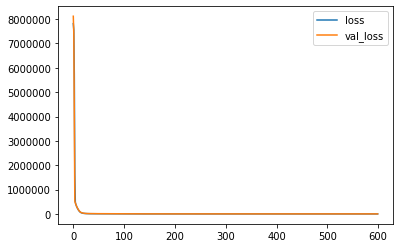

In [19]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [92]:
predictions = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [93]:
mean_squared_error(y_test,predictions)

1454.7455142347314

In [94]:
np.sqrt(mean_squared_error(y_test,predictions))

38.14112628429752

In [95]:
np.sqrt(mean_squared_error(y_test,predictions))/ df['FVC'].mean()

0.014174788290644499

In [25]:
explained_variance_score(y_test, predictions)

0.9979040215565835

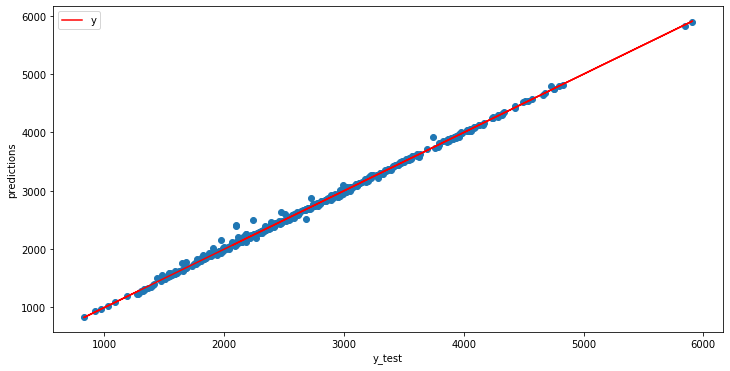

In [26]:
plt.figure(figsize = (12,6))
plt.scatter(x = y_test, y= predictions)
plt.plot(y_test, y_test, 'r')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.legend('y')

In [27]:
from tensorflow.keras.models import load_model
model.save('finalized_model_FVC_#3.h5') 

In [28]:
df_test = pd.read_csv('test.csv')

In [29]:
dummies_test = pd.get_dummies(df_test[['Sex', 'SmokingStatus', 'Patient']])
df_test = pd.concat([df_test, dummies_test], axis = 1)
df_test = df_test.drop(['Patient', 'Sex', 'SmokingStatus'], axis =1)

In [30]:
missing_cols = set( df.columns ) - set( df_test.columns )

In [31]:
for c in missing_cols:
    df_test[c] = 0
X_test_2 = df_test.drop('FVC', axis =1)
y_test_2 = df_test['FVC']
X_test_2 = scaler.transform(X_test_2)

In [110]:
#model = load_model('finalized_model_FVC.h5')
predictions_2 = model.predict(X_test_2)

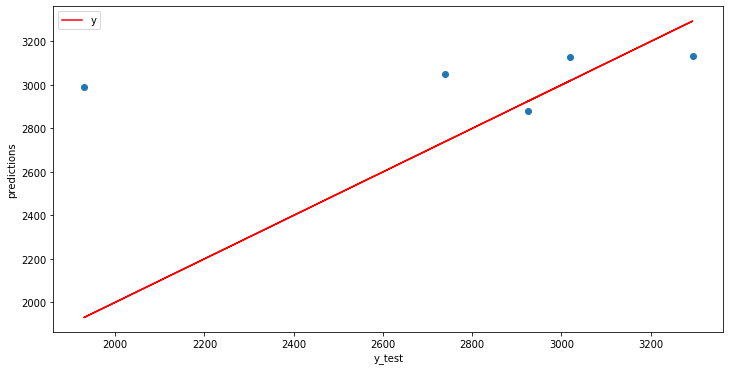

In [111]:
plt.figure(figsize = (12,6))
plt.scatter(x = y_test_2, y= predictions_2)
plt.plot(y_test_2, y_test_2, 'r')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.legend('y')

In [112]:
np.sqrt(mean_squared_error(y_test_2, predictions_2))

501.16633946119265

In [60]:
df_test_2 = pd.read_csv('test_1.csv')

In [61]:
df_test_2.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00426637202313170790466,0,NaN,71.824968,73,Male,Never smoked
1,ID00423637202312137826377,17,NaN,79.258903,72,Male,Ex-smoker
2,ID00422637202311677017371,6,NaN,76.672493,73,Male,Ex-smoker
3,ID00421637202311550012437,15,NaN,82.045291,68,Male,Ex-smoker
4,ID00419637202311204720264,6,NaN,70.186855,73,Male,Ex-smoker


In [62]:
dummies_test_2 = pd.get_dummies(df_test_2[['Sex', 'SmokingStatus', 'Patient']])
df_test_2 = pd.concat([df_test_2, dummies_test_2], axis = 1)
df_patient = df_test_2['Patient']
df_test_2 = df_test_2.drop(['Patient', 'Sex', 'SmokingStatus'], axis =1)
    

In [63]:
missing_cols = set( df.columns ) - set( df_test_2.columns )

In [64]:
for c in missing_cols:
    df_test_2[c] = 0
X_test_22 = df_test_2.drop('FVC', axis =1)
X_test_22 = scaler.transform(X_test_22)

In [65]:
predictions = model.predict(X_test_22)

In [66]:
df_test_2['predictions'] = predictions

In [67]:
df_test_2.head()

,Weeks,FVC,Percent,Age,Sex_Male,SmokingStatus_Ex-smoker,SmokingStatus_Never smoked,Patient_ID00419637202311204720264,Patient_ID00421637202311550012437,Patient_ID00422637202311677017371,...,Patient_ID00275637202271440119890,Patient_ID00199637202248141386743,Patient_ID00062637202188654068490,Patient_ID00267637202270790561585,Patient_ID00219637202258203123958,Patient_ID00125637202218590429387,Patient_ID00305637202281772703145,Patient_ID00172637202238316925179,Patient_ID00336637202286801879145,predictions
0,0,NaN,71.824968,73,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2882.163086
1,17,NaN,79.258903,72,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3133.137939
2,6,NaN,76.672493,73,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2988.368408
3,15,NaN,82.045291,68,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3049.735596
4,6,NaN,70.186855,73,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3126.895264


In [69]:
df_test_final = df_test_2[['Weeks', 'predictions']]

In [71]:
df_test_final = pd.concat([df_patient, df_test_final], axis =1)

In [72]:
df_test_final.head()

,Patient,Weeks,predictions
0,ID00426637202313170790466,0,2882.163086
1,ID00423637202312137826377,17,3133.137939
2,ID00422637202311677017371,6,2988.368408
3,ID00421637202311550012437,15,3049.735596
4,ID00419637202311204720264,6,3126.895264


In [73]:
df_test_final['Patient_Week'] = df_test_final['Patient'] + '_' + df_test_final['Weeks'].astype(str)

In [80]:
#df_test_final = df_test_final.drop(['Patient', 'Weeks'], axis =1)
df_test_final.rename(columns= {"predictions": "FVC"}, inplace = True)
df_test_final.head()

,FVC,Patient_Week
0,2882.163086,ID00426637202313170790466_0
1,3133.137939,ID00423637202312137826377_17
2,2988.368408,ID00422637202311677017371_6
3,3049.735596,ID00421637202311550012437_15
4,3126.895264,ID00419637202311204720264_6


In [82]:
cols = df_test_final.columns.tolist()

In [84]:
cols = cols[-1:] + cols[:-1]

In [85]:
cols

['Patient_Week', 'FVC']

In [87]:
df_test_final = df_test_final[cols]
df_test_final.head()

,Patient_Week,FVC
0,ID00426637202313170790466_0,2882.163086
1,ID00423637202312137826377_17,3133.137939
2,ID00422637202311677017371_6,2988.368408
3,ID00421637202311550012437_15,3049.735596
4,ID00419637202311204720264_6,3126.895264


In [88]:
len(df_test_final)

785

In [96]:
confidence = [100*(1-(np.sqrt(mean_squared_error(y_test,predictions))/ df['FVC'].mean()))] * len(df_test_final)

In [98]:
df_test_final['confidence'] = confidence

In [109]:
df_test_final.head()

,Patient_Week,FVC,confidence
0,ID00426637202313170790466_0,2882.163086,98.582521
1,ID00423637202312137826377_17,3133.137939,98.582521
2,ID00422637202311677017371_6,2988.368408,98.582521
3,ID00421637202311550012437_15,3049.735596,98.582521
4,ID00419637202311204720264_6,3126.895264,98.582521


In [100]:
df_test_final.to_csv('submission_Ellaboudy.csv')

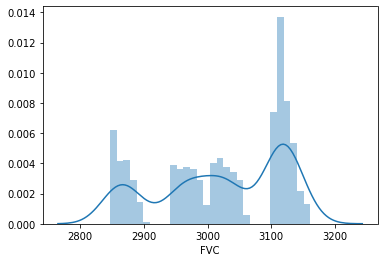

In [115]:
sns.distplot(df_test_final['FVC'], bins = 30)